# Comprehensive Guide on SARSA Reinforcement Learning Algorithm in Python

## Introduction

Reinforcement Learning (RL) is a powerful machine learning paradigm. In RL, a software, usually called an agent, learns to interact with environments to solve complex problems through trial and error, all without human intervention. Among RL algorithms, SARSA stands out for its efficient on-policy nature. 

SARSA stands for State-Action-Reward-State-Action, representing a cycle the agent follows to solve problems. This cycle allows the agent to learn from its past mistakes and occasionally venture out to try new things. This behavior makes the algorithm particularly effective in specific problem types (discussed more later) and differentiates it from off-policy algorithms like Q-learning. 

In this tutorial, you will gain an intuition into how SARSA works and how you can implement it in Python. To make your understanding tangible, we will use a classic Cliff Walking problem throughout. We will also discuss SARSA's advantages, limitations and its real-world applications. 

## Prerequisites and Fundamentals

### Reinforcement Learning Basics
- Agents, environments, states, and actions
- Rewards and return


### Markov Decision Processes (MDPs)
- Markov property
- State transition probabilities
- Reward function


### Q-learning Fundamentals
- Action-value function (Q-function)
- Bellman equation


### Exploration vs. Exploitation
- Epsilon-greedy policy


### On-policy vs. Off-policy Learning


### SARSA vs Q-learning: Key Differences



## SARSA Algorithm Explained
- Step-by-step breakdown of the algorithm
- SARSA update rule
- Differences between SARSA and Q-learning (expanded)



## Implementing SARSA for Cliff Walking

### 1. Setting up the Cliff Walking environment


### 2. Initializing the Q-table


### 3. Implementing the epsilon-greedy policy


### 4. SARSA update function


### 5. Hyperparameter selection
   - Learning rate
   - Discount factor
   - Epsilon (exploration rate)


### 6. Training loop


### 7. Visualizing the learned policy


### 8. Common Challenges and Solutions



## Experiments and Results
- Training the agent
- Analyzing the learned policy
- Comparing SARSA's performance with Q-learning
- Interpreting results and debugging tips



## Conclusion
- Recap of SARSA algorithm
- Advantages and limitations
- Real-world applications of SARSA
- Further reading and resources

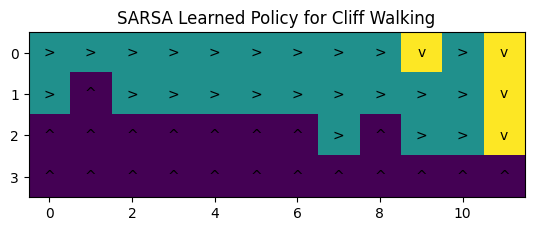

In [5]:
import numpy as np
import matplotlib.pyplot as plt


# Cliff Walking environment
class CliffWalkingEnv:
    def __init__(self):
        self.height = 4
        self.width = 12
        self.start_state = (3, 0)
        self.goal_state = (3, 11)
        self.cliff = [(3, i) for i in range(1, 11)]

    def step(self, state, action):
        i, j = state
        if action == 0:
            i = max(i - 1, 0)
        elif action == 1:
            j = min(j + 1, self.width - 1)
        elif action == 2:
            i = min(i + 1, self.height - 1)
        elif action == 3:
            j = max(j - 1, 0)

        next_state = (i, j)

        if next_state in self.cliff:
            return self.start_state, -100
        elif next_state == self.goal_state:
            return next_state, 0
        else:
            return next_state, -1

    def reset(self):
        return self.start_state


# SARSA algorithm
def sarsa(env, episodes, alpha=0.1, gamma=0.99, epsilon=0.1):
    Q = np.zeros((env.height, env.width, 4))

    def epsilon_greedy(state):
        if np.random.random() < epsilon:
            return np.random.randint(4)
        else:
            return np.argmax(Q[state])

    for _ in range(episodes):
        state = env.reset()
        action = epsilon_greedy(state)

        while state != env.goal_state:
            next_state, reward = env.step(state, action)
            next_action = epsilon_greedy(next_state)

            Q[state + (action,)] += alpha * (
                reward + gamma * Q[next_state + (next_action,)] - Q[state + (action,)]
            )

            state, action = next_state, next_action

    return Q


# Training
env = CliffWalkingEnv()
Q = sarsa(env, episodes=10000)

# Visualize policy
policy = np.argmax(Q, axis=2)
actions = ["^", ">", "v", "<"]
policy_chars = np.array([[actions[a] for a in row] for row in policy])

plt.imshow(policy)
for i in range(env.height):
    for j in range(env.width):
        plt.text(j, i, policy_chars[i, j], ha="center", va="center")
plt.title("SARSA Learned Policy for Cliff Walking")
plt.show()